#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

어떠한 대상을 인식 할 수 있도록 '이것은 이것이다' 식으로 학습 시키는 것을 말합니다.
회귀와 분류로 나누어 집니다.

[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

먼저 (1) 모듈을 불러온 뒤, (2) 필요한 데이터들을 전처리(이상값,결측치,중복값) 등을
print(제거합니다) (3) 그래프나 메서드를 사용하여 속성들의 관계를 파악하고 , 그로 하여금 피쳐와 타겟을 나누어 학습 시킵니다.
(4) 데이터 분석에 적합하다고 생각하는 모델을 선정하여 핏시켜 모델을 생성합니다. (5) 모델의 예측값과 실제 데이터 값의 스코어 점수를 보거나 정확도, 재현율등을 파악 할 수 있습니다.

[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

선형 회귀란 그래프 상에서 선형의 분포를 가지는 데이터들간의 수치의 변동을 통해 데이터를 분석하는 방식입니다. 선형회귀의 가중치(W)와 절편(B)을 통하여 Y=WX+B형태의 퍼셉트론을 만들어 냅니다.

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

로지스틱 회귀는 주로 이진분류에 사용되는 회귀방식이지만, 분류의 방식에 더 가깝습니다. 타겟의 값들이 두가지의 형태로 분류되어 '0 OR 1'이런식의 판단을 내릴수가 있게 됩니다.  

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

In [2]:
#모듈 로딩
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import torch

import torch.nn as nn   #LinearRegression 기능의 클래스 Linear
import torch.nn.functional as F #손실함수
import torch.optim as optim  #경사하강법 기반의 최적화 관련 모듈

In [3]:
### ===> 데이터 준비
fashion_db='fashion-mnist'
fashion_data=fetch_openml(name=fashion_db,parser='auto')#,as_frame=False) #넘파이로 가져오기

In [4]:
fashion_data

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       1       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0      33   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [5]:
### ====> 데이터 확인
feature=fashion_data['data']
target=fashion_data['target']

In [6]:
# 피쳐와 타겟 개수 확인
print(f'Feature: {feature.shape},{feature.ndim}D')
print(f'Target: {target.shape},{target.ndim}D')  #원핫 인코더 쓸때 확인

Feature: (70000, 784),2D
Target: (70000,),1D


In [7]:
# 분류 확인(CLASS 보기)
print(f'feature Name=> {fashion_data["feature_names"]}')
print(f'target Name=> {fashion_data["target_names"]}')
print(f'CATEGORIES => {fashion_data["categories"]}')  #데이터 프레임일떄 불가능
print(f'CATEGORIES => {target.unique()}')

feature Name=> ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pi

[2] 데이터 가공 전처리 <hr>
- 결측치/중복/이상치 => 없음
- 다중분류==> 2진분류 변환 : target 변환
- 표준화 ==> 이미지 동일 크기 및 색상 채널 : 동일 크기(28*28)와  채널(흑백 1)
- 정규화 => 피쳐 정규화/ 타겟 정규화 

In [8]:
### ===> [2-1] 다중분류 ==> 2진분류 변환: target 변환
type(target)  #시리즈이다.

#마스크 처리가 편하다.
target=target =='0'
target.unique()


array([False,  True])

표준화는 필요 없고. 


In [9]:
###==> [2-2] 정규화 ===> 피쳐: 784개 색상값 즉, 0~255 범위 값
norm_feature=feature/255. #숫자뒤에 점 찍으면 실수(float)로 형변환


In [10]:
###=> [2-2] 정규화 ===> 타겟: 이대로 쓰거나, one-hot encoder로 바꾸던가, label 인코더로 쓰던가.
#scikitlearn=> onehot 인코더
# get-dummies( 판다스)  #0,1로 바꾸기
pd.get_dummies(target)

,False,True
0,True,False
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
69995,True,False
69996,True,False
69997,True,False
69998,True,False


In [11]:
from sklearn.preprocessing import OneHotEncoder

targetDF=target.to_frame() #타겟을 다시 데이터프레임으로
print(targetDF.shape)


(70000, 1)


In [12]:
[target.values],targetDF.values

([array([False,  True,  True, ..., False, False, False])],
 array([[False],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]]))

In [13]:
# sparse_output=False : ndarray 타입으로 반환
ohEncoder = OneHotEncoder(sparse_output=False)  #풀어서 준다(압축 행렬을)
ohEncoder.fit(targetDF)
ohEncoder.categories_  #원본에 적용된다는 의미 _

 #false면 앞에가 1이 찍히고, true면 뒤에가 1이 찍힌다.

[array([False,  True])]

In [14]:
norm_target=ohEncoder.transform(targetDF)  #압축되어서 준다 => toarray()쓸수도 있다=> 그런데 처음 부터 sparse_output을 쓰면 처음부터 ndarray타입으로 바꿔 주므로 다시 toarray로 풀어서 쓸 필요가 없다. 
norm_target.shape,norm_target.ndim #2차원으로 바꾸어서 준다( 얘를 쓸때도 있다)

((70000, 2), 2)

In [15]:
fashion_data['target']  #현재 시리즈 형태로 묶여 있음이 보인다.

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
#회귀의 경우 원핫 인코더를 쓸수는 없음(분류가 안됨)

[3] 학습 준비 <hr>
- 텐서화
- 데이터 셋 준비 : 훈련용(train), 테스트용(test)
- 학습 방법: 지도학습 -이진분류=> Linear 클래스 + 시그모이드 함수(1,0) 즉 linear를 1과 0만으로 2진 분류 해내면 됨
- 최적화 방법: 경사하강법 기반의 방법=> Adam,SDG
- 손실함수: 이진분류 손실 계산 함수 : binary_cross_entropy


In [17]:
### ---> 데이터셋 준비 :60000개 훈련, 10000개 테스트
limit=60000
train=norm_feature.iloc[:limit]
test=norm_feature.iloc[limit:]
#아직까지는 텐서가 아님
train_y=target[:limit]
test_y=target[limit:]

In [18]:
print(f'train {train.shape},{train.ndim}D,{train_y.shape},{train_y.ndim}D')  
print(f'test {test.shape},{test.ndim}D,{test_y.shape},{test_y.ndim}D')

train (60000, 784),2D,(60000,),1D
test (10000, 784),2D,(10000,),1D


In [19]:
###텐서로 변환
X_train=torch.FloatTensor(train.values)# array를 뽑는 법=.values
X_test=torch.FloatTensor(test.values) 

y_train=torch.FloatTensor(train_y.values).unsqueeze(dim=1) #64비트 정수형 데이터 타입=LONG 타입
y_test=torch.FloatTensor(test_y.values).unsqueeze(dim=1)

In [20]:
print(f'X_train {X_train.shape},{X_train.ndim}D,{y_train.shape},{y_train.ndim}D')  
print(f'X_test {X_test.shape},{X_test.ndim}D,{y_test.shape},{y_test.ndim}D')

X_train torch.Size([60000, 784]),2D,torch.Size([60000, 1]),2D
X_test torch.Size([10000, 784]),2D,torch.Size([10000, 1]),2D


In [33]:
X_train.shape #X_train.shape[0]=60000,X_train.shape[1]=784
y_train.shape #X_train.shape[0]=60000,X_train.shape[1]=1

torch.Size([60000, 1])

In [21]:
## 학습 인스턴스 생성
in_,out_=X_train.shape[1],y_train.shape[1] #784개를 넣었을때 한개만 나올것
model=nn.Linear(in_,out_)  #in_:   #out_

In [22]:
model

Linear(in_features=784, out_features=1, bias=True)

In [23]:
## 최적화 인스턴스 생성 => 모델에서 사용하는 w,b 변수들 전달
optimizer=optim.Adam(model.parameters()  )

In [24]:
### 학습 횟수 => 샘플 처음부터 끝까지 읽는 것 기준으로 횟수 지정
EPOCHS=150




[4] 학습 <hr>
-반복횟수 만큼 학습 진행


In [25]:
loss_accuracy=[[],[]]
for ep in range(EPOCHS):
    # 학습
    pre_y=model(X_train)
    # print(f'예측값:{pre_y}')
    #분류값 변환
    pre_y2=F.sigmoid(pre_y)
    # print(f'분류값:{pre_y2}')
    #오차 즉 손실 계산
    loss=F.binary_cross_entropy(pre_y2,y_train)
    loss_accuracy[0].append(loss.item())
    print(f'[{ep}] Loss => {loss}')
    
    # W,b 업데이트
    optimizer.zero_grad() #기울기가 누적되지 않도록 다시 리셋
    loss.backward() #손실함수 계산값으로 미분 진행하여 새로운 W,b 계산
    optimizer.step() #새로운 값으로 w,b 업데이트
    
    #정확도() 계산 => 예측값을 0과 1로 변환하여 정답지와 비교해야 한다.(시그모이드로 나온 것은(pre_y2)는 0,1이 아니므로....)
    train_accuracy=((y_train==(pre_y2>=0.5)).sum())/y_train.shape[0] #784개
    loss_accuracy[1].append(train_accuracy.item())
    

[0] Loss => 0.7403444051742554
[1] Loss => 0.6552056074142456
[2] Loss => 0.5854042172431946
[3] Loss => 0.5301357507705688
[4] Loss => 0.4877762496471405
[5] Loss => 0.45622584223747253
[6] Loss => 0.43328148126602173
[7] Loss => 0.41690418124198914
[8] Loss => 0.4053543508052826
[9] Loss => 0.39722776412963867
[10] Loss => 0.39143404364585876
[11] Loss => 0.38715001940727234
[12] Loss => 0.383768230676651
[13] Loss => 0.38084936141967773
[14] Loss => 0.37808260321617126
[15] Loss => 0.37525463104248047
[16] Loss => 0.37222495675086975
[17] Loss => 0.36890771985054016
[18] Loss => 0.36525797843933105
[19] Loss => 0.36126139760017395
[20] Loss => 0.356926292181015
[21] Loss => 0.3522782623767853
[22] Loss => 0.3473553955554962
[23] Loss => 0.34220507740974426
[24] Loss => 0.3368813693523407
[25] Loss => 0.3314425051212311
[26] Loss => 0.3259492814540863
[27] Loss => 0.3204629123210907
[28] Loss => 0.31504347920417786
[29] Loss => 0.3097481429576874
[30] Loss => 0.3046290874481201
[31] 

In [26]:
#이제 분류만 하면 된다. 예측값 == 정답치 와 얼마나 맞는지를 찾아서 sum 해버리면 맞춘 개수가 나온다. 

In [27]:
(y_train==(pre_y2>=0.5)).sum() # 시그모이드가 0,1로 만들어 주는 것이 아니라, 여기서 따로 계산을 해주어야 한다.

tensor(57209)

In [28]:
((y_train==(pre_y2>=0.5)).sum())/y_train.shape[0]  #정확도 계산

tensor(0.9535)

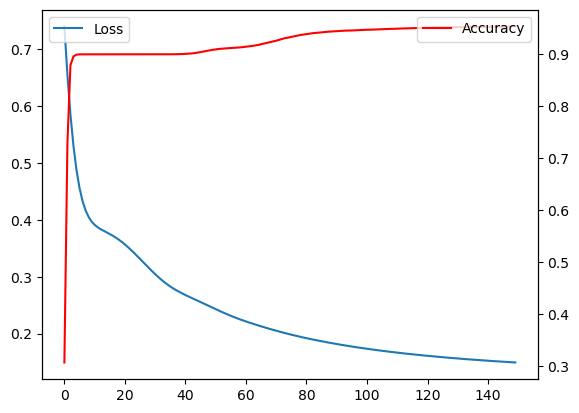

In [29]:
## 손실과 정확도 시각화
import matplotlib.pyplot as plt
fig,ax1=plt.subplots() #축을 두개 쓰기 위해서 
ax1.plot(loss_accuracy[0],label='Loss')
ax2=ax1.twinx()
ax2.plot(loss_accuracy[1],label='Accuracy',color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xlabel('Epochs')
plt.show()